In [76]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

from rich import print

In [77]:
plt.style.use("seaborn-v0_8")

In [78]:
data_schema = {
    "CustomerID": pl.Int32,
    "Age": pl.Int32,
    "Gender": pl.String,
    "Tenure": pl.Int32,
    "Usage Frequency": pl.Int32,
    "Support Calls": pl.Int32,
    "Payment Delay": pl.Int32,
    "Subscription Type": pl.String,
    "Contract Length": pl.String,
    "Total Spend": pl.Float32,
    "Last Interaction": pl.Int32,
    "Churn": pl.Int32,
}

In [79]:
train_df = pl.scan_csv("../data/train.csv", schema=data_schema)
test_df = pl.scan_csv("../data/test.csv", schema=data_schema)

In [80]:
full_df = pl.concat([train_df, test_df])  # NOTE: this is for analysis only

In [81]:
full_df.head().collect()

CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
i32,i32,str,i32,i32,i32,i32,str,str,f32,i32,i32
2,30,"""Female""",39,14,5,18,"""Standard""","""Annual""",932.0,17,1
3,65,"""Female""",49,1,10,8,"""Basic""","""Monthly""",557.0,6,1
4,55,"""Female""",14,4,6,18,"""Basic""","""Quarterly""",185.0,3,1
5,58,"""Male""",38,21,7,7,"""Standard""","""Monthly""",396.0,29,1
6,23,"""Male""",32,20,5,8,"""Basic""","""Monthly""",617.0,20,1


In [82]:
print("Dataset Shape:", full_df.collect().shape)

Dataset Shape:
(505207, 12)

In [83]:
full_df.drop(
    pl.col(["Gender", "Contract Length", "Subscription Type", "CustomerID", "Churn"])
).describe()

statistic,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
str,f64,f64,f64,f64,f64,f64,f64
"""count""",505206.0,505206.0,505206.0,505206.0,505206.0,505206.0,505206.0
"""null_count""",1.0,1.0,1.0,1.0,1.0,1.0,1.0
"""mean""",39.704172,31.350435,15.714825,3.833317,13.496843,620.072754,14.610581
"""std""",12.670577,17.237482,8.619323,3.133603,8.451187,245.31926,8.608286
"""min""",18.0,1.0,1.0,0.0,0.0,100.0,1.0
"""25%""",29.0,16.0,8.0,1.0,6.0,446.0,7.0
"""50%""",40.0,32.0,16.0,3.0,13.0,648.900024,14.0
"""75%""",49.0,46.0,23.0,6.0,20.0,824.0,22.0
"""max""",65.0,60.0,30.0,10.0,30.0,1000.0,30.0


In [84]:
full_df.null_count().collect()

CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
1,1,1,1,1,1,1,1,1,1,1,1


In [85]:
full_df = full_df.drop_nulls()

In [86]:
full_df.null_count().collect()

CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0


In [87]:
churn_distribution = full_df.group_by("Churn").agg(
    pl.count("Churn").alias("count"),
    (pl.count("Churn") / len(full_df.collect()) * 100).alias("percentage"),
)

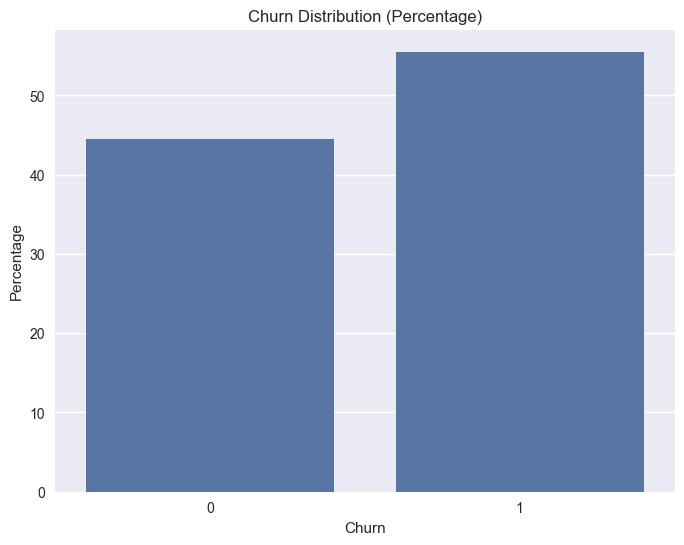

In [88]:
plt.figure(figsize=(8, 6))
sns.barplot(data=churn_distribution.collect(), x="Churn", y="percentage")
plt.title("Churn Distribution (Percentage)")
plt.ylabel("Percentage")
plt.show()

In [89]:
categorical_cols = ["Gender", "Subscription Type", "Contract Length"]

numerical_cols = [
    "Age",
    "Tenure",
    "Usage Frequency",
    "Support Calls",
    "Payment Delay",
    "Total Spend",
    "Last Interaction",
    "Churn",
]

print("\nCategorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

print("\nUnique values in categorical columns:")
for col in categorical_cols:
    unique_values = full_df.select(pl.col(col)).unique().collect()
    print(f"\n{col}:", unique_values)

Categorical Columns:
['Gender', 'Subscription Type', 'Contract Length']

Numerical Columns:
['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']

Unique values in categorical columns:

Gender: shape: (2, 1)
┌────────┐
│ Gender │
│ ---    │
│ str    │
╞════════╡
│ Male   │
│ Female │
└────────┘

Subscription Type: shape: (3, 1)
┌───────────────────┐
│ Subscription Type │
│ ---               │
│ str               │
╞═══════════════════╡
│ Basic             │
│ Premium           │
│ Standard          │
└───────────────────┘

Contract Length: shape: (3, 1)
┌─────────────────┐
│ Contract Length │
│ ---             │
│ str             │
╞═════════════════╡
│ Annual          │
│ Monthly         │
│ Quarterly       │
└─────────────────┘

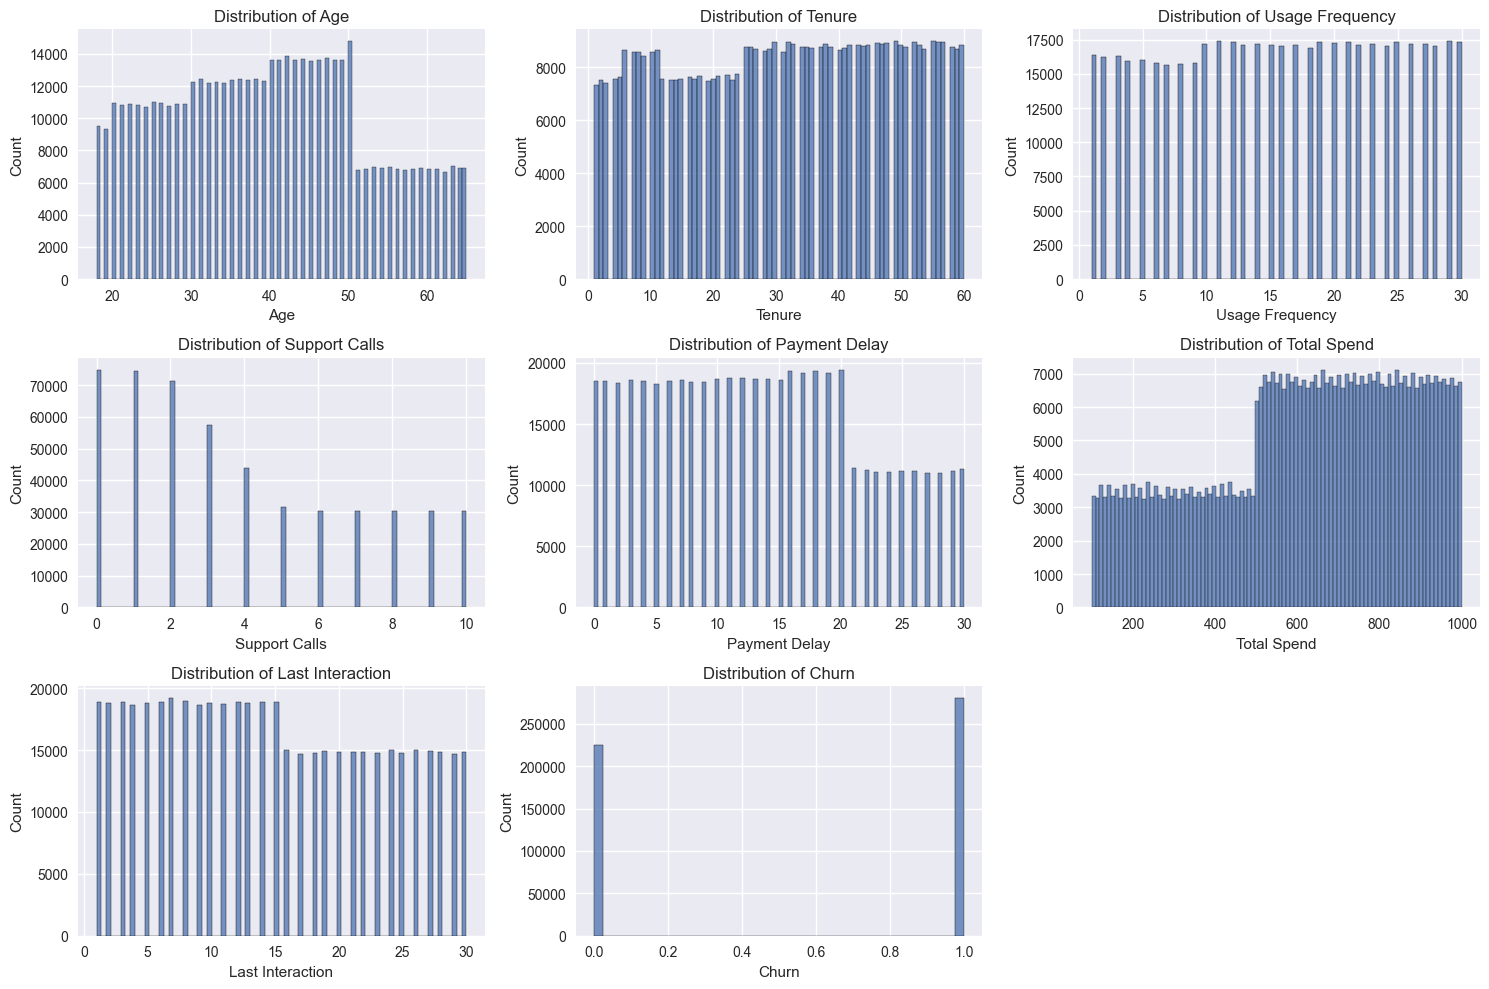

In [90]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=full_df.collect(), x=col)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

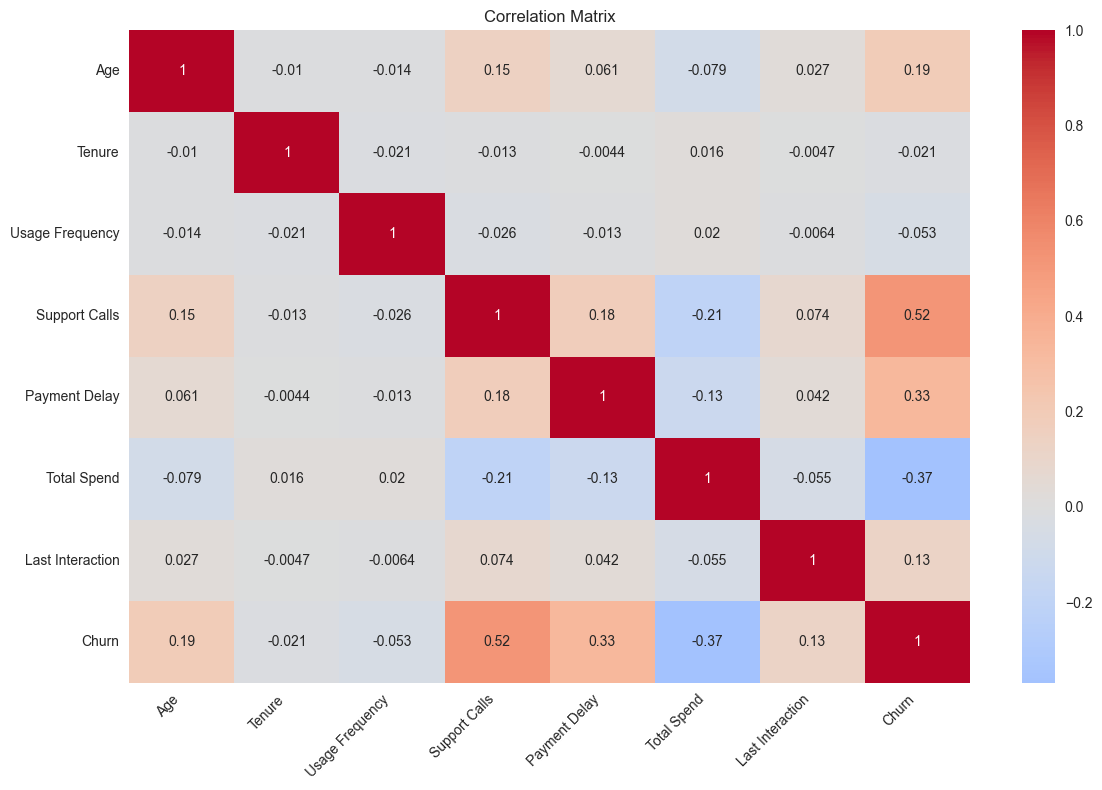

In [91]:
numerical_df = full_df.select(numerical_cols).collect()
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    xticklabels=numerical_cols,
    yticklabels=numerical_cols,
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

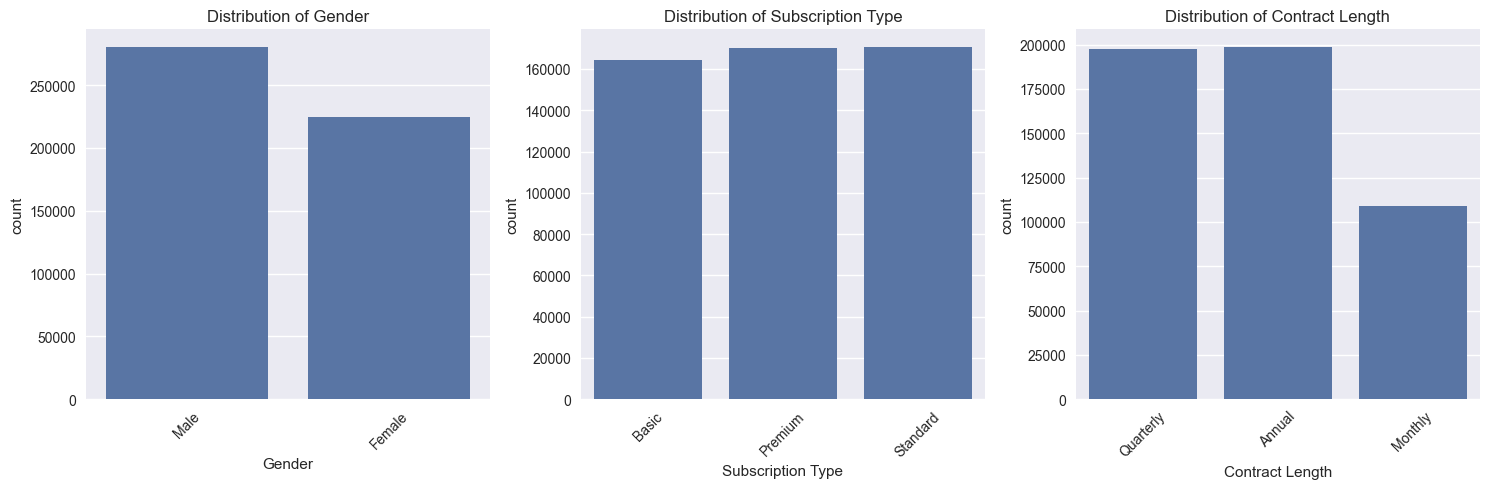

In [92]:
plt.figure(figsize=(15, 5))

for idx, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, idx)
    dist_data = full_df.group_by(col).agg(pl.len().alias("count")).collect()
    sns.barplot(data=dist_data, x=col, y="count")
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

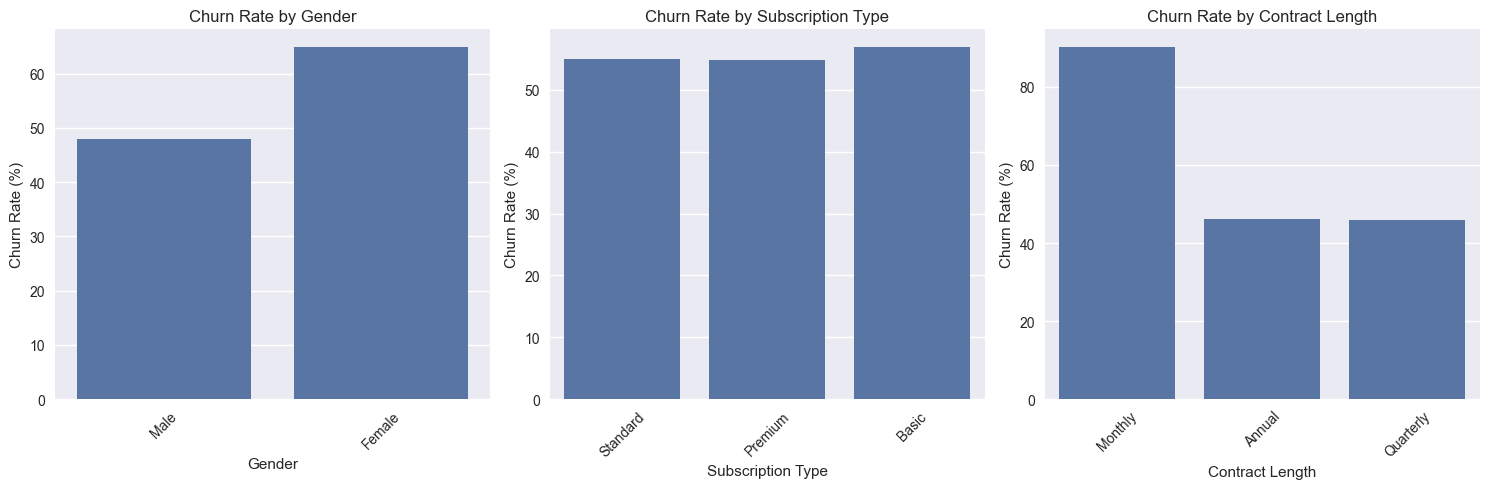

In [93]:
plt.figure(figsize=(15, 5))

for idx, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, idx)
    churn_by_cat = (
        full_df.group_by(col)
        .agg((pl.mean("Churn") * 100).alias("churn_rate"))
        .collect()
    )
    sns.barplot(data=churn_by_cat, x=col, y="churn_rate")
    plt.xticks(rotation=45)
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate (%)")

plt.tight_layout()
plt.show()

In [94]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [95]:
def one_hot_encode_features(
    df: pl.DataFrame, categorical_features: list[str]
) -> pl.DataFrame:
    encoder = OneHotEncoder(sparse_output=False, drop="first")
    df_pandas = df.to_pandas()
    encoded_features = encoder.fit_transform(df_pandas[categorical_features])

    feature_names = encoder.get_feature_names_out(categorical_features)
    encoded_df = pd.DataFrame(encoded_features, columns=feature_names)
    final_df = pd.concat(
        [df_pandas.drop(columns=categorical_features), encoded_df], axis=1
    )

    return pl.from_pandas(final_df)


encoded_df = one_hot_encode_features(full_df.collect(), categorical_cols)

In [96]:
print("\nNew columns after encoding:")
print(encoded_df.columns)

New columns after encoding:

[
    'CustomerID',
    'Age',
    'Tenure',
    'Usage Frequency',
    'Support Calls',
    'Payment Delay',
    'Total Spend',
    'Last Interaction',
    'Churn',
    'Gender_Male',
    'Subscription Type_Premium',
    'Subscription Type_Standard',
    'Contract Length_Monthly',
    'Contract Length_Quarterly'
]

In [97]:
encoded_df.head()

CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
i32,i32,i32,i32,i32,i32,f32,i32,i32,f64,f64,f64,f64,f64
2,30,39,14,5,18,932.0,17,1,0.0,0.0,1.0,0.0,0.0
3,65,49,1,10,8,557.0,6,1,0.0,0.0,0.0,1.0,0.0
4,55,14,4,6,18,185.0,3,1,0.0,0.0,0.0,0.0,1.0
5,58,38,21,7,7,396.0,29,1,1.0,0.0,1.0,1.0,0.0
6,23,32,20,5,8,617.0,20,1,1.0,0.0,0.0,1.0,0.0


In [98]:
feature_names = encoded_df.columns
full_df = encoded_df

In [99]:
full_df.head()

CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
i32,i32,i32,i32,i32,i32,f32,i32,i32,f64,f64,f64,f64,f64
2,30,39,14,5,18,932.0,17,1,0.0,0.0,1.0,0.0,0.0
3,65,49,1,10,8,557.0,6,1,0.0,0.0,0.0,1.0,0.0
4,55,14,4,6,18,185.0,3,1,0.0,0.0,0.0,0.0,1.0
5,58,38,21,7,7,396.0,29,1,1.0,0.0,1.0,1.0,0.0
6,23,32,20,5,8,617.0,20,1,1.0,0.0,0.0,1.0,0.0


In [100]:
new_list = [
    "spend_per_age",
    "spend_per_tenure",
    "support_calls_per_tenure",
    "usage_per_tenure",
    "daily_usage_rate",
    "usage_value_index",
    "problem_customer_score",
    "risk_score",
    "engagement_score",
    "high_support_user",
    "payment_reliability_score",
    "Churn",
]

new_numeric_features = [
    (pl.col("Total Spend") / pl.col("Age")).alias("spend_per_age"),
    (pl.col("Total Spend") / pl.col("Tenure")).alias("spend_per_tenure"),
    (pl.col("Support Calls") / pl.col("Tenure")).alias("support_calls_per_tenure"),
    (pl.col("Usage Frequency") / pl.col("Tenure")).alias("usage_per_tenure"),
    (pl.col("Usage Frequency") / 30).alias("daily_usage_rate"),
    (
        pl.when(pl.col("Total Spend") > pl.col("Total Spend").quantile(0.75))
        .then(pl.lit("Premium"))
        .when(pl.col("Total Spend") > pl.col("Total Spend").quantile(0.25))
        .then(pl.lit("Regular"))
        .otherwise(pl.lit("Basic"))
    ).alias("Value_Segment"),
    (pl.col("Usage Frequency") * pl.col("Total Spend")).alias("usage_value_index"),
    (pl.col("Support Calls") * pl.col("Payment Delay")).alias("problem_customer_score"),
    (pl.col("Payment Delay") + (pl.col("Support Calls") / pl.col("Tenure"))).alias(
        "risk_score"
    ),
    (
        pl.col("Usage Frequency") * 0.4
        + (1 / (pl.col("Last Interaction") + 1)) * 0.3
        + (pl.col("Total Spend") / pl.col("Tenure")) * 0.3
    ).alias("engagement_score"),
    (pl.col("Support Calls") > pl.col("Support Calls").mean()).alias(
        "high_support_user"
    ),
    (1 - pl.col("Payment Delay") / pl.col("Payment Delay").max()).alias(
        "payment_reliability_score"
    ),
]

In [101]:
full_df = full_df.with_columns(new_numeric_features)

In [102]:
full_df

CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly,spend_per_age,spend_per_tenure,support_calls_per_tenure,usage_per_tenure,daily_usage_rate,Value_Segment,usage_value_index,problem_customer_score,risk_score,engagement_score,high_support_user,payment_reliability_score
i32,i32,i32,i32,i32,i32,f32,i32,i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,i32,f64,f64,bool,f64
2,30,39,14,5,18,932.0,17,1,0.0,0.0,1.0,0.0,0.0,31.066667,23.897436,0.128205,0.358974,0.466667,"""Premium""",13048.0,90,18.128205,12.785898,true,0.4
3,65,49,1,10,8,557.0,6,1,0.0,0.0,0.0,1.0,0.0,8.569231,11.367347,0.204082,0.020408,0.033333,"""Regular""",557.0,80,8.204082,3.853061,true,0.733333
4,55,14,4,6,18,185.0,3,1,0.0,0.0,0.0,0.0,1.0,3.363636,13.214286,0.428571,0.285714,0.133333,"""Basic""",740.0,108,18.428571,5.639286,true,0.4
5,58,38,21,7,7,396.0,29,1,1.0,0.0,1.0,1.0,0.0,6.827586,10.421053,0.184211,0.552632,0.7,"""Basic""",8316.0,49,7.184211,11.536316,true,0.766667
6,23,32,20,5,8,617.0,20,1,1.0,0.0,0.0,1.0,0.0,26.826087,19.28125,0.15625,0.625,0.666667,"""Regular""",12340.0,40,8.15625,13.798661,true,0.733333
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
64370,45,33,12,6,21,947.0,14,1,0.0,0.0,0.0,0.0,1.0,21.044444,28.69697,0.181818,0.363636,0.4,"""Premium""",11364.0,126,21.181818,13.429091,true,0.3
64371,37,6,1,5,22,923.0,9,1,1.0,0.0,1.0,0.0,0.0,24.945946,153.833333,0.833333,0.166667,0.033333,"""Premium""",923.0,110,22.833333,46.580002,true,0.266667
64372,25,39,14,8,30,327.0,20,1,1.0,1.0,0.0,1.0,0.0,13.08,8.384615,0.205128,0.358974,0.466667,"""Basic""",4578.0,240,30.205128,8.12967,true,0.0


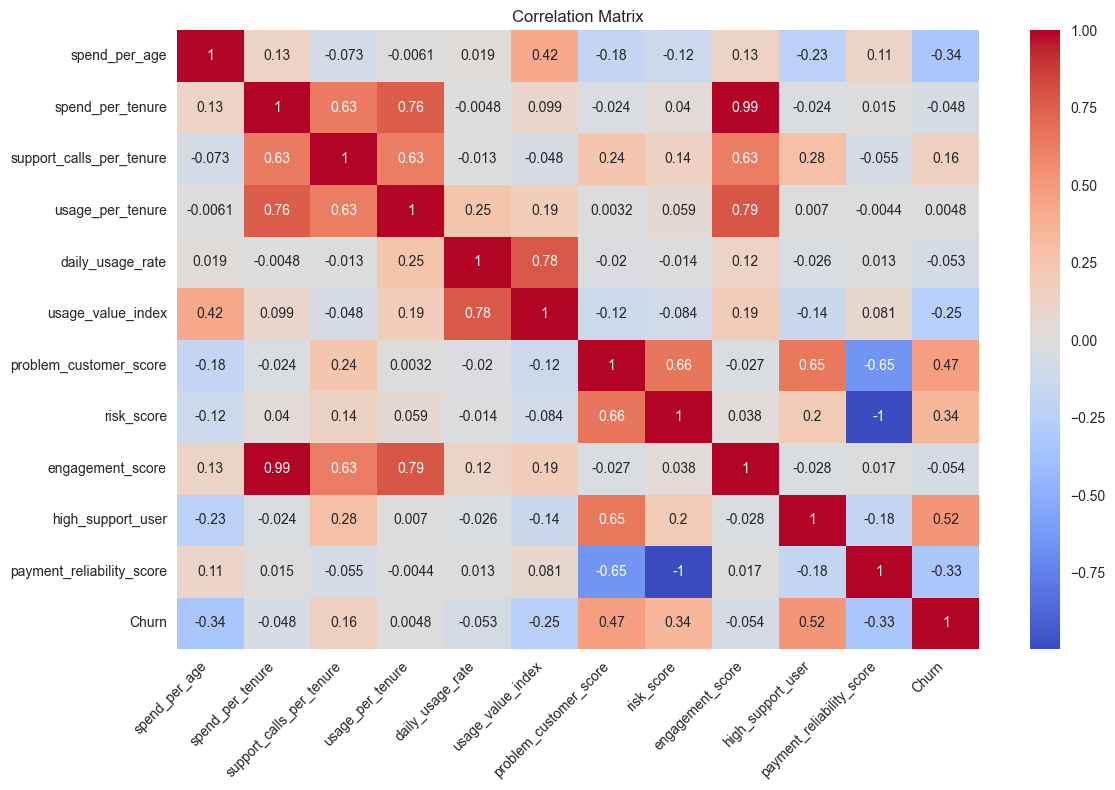

In [103]:
numerical_df = full_df.select(new_list)
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    xticklabels=new_list,
    yticklabels=new_list,
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [104]:
full_df = full_df.drop(
    pl.col(
        [
            "CustomerID",
            "spend_per_tenure",
            "engagement_score",
            "risk_score",
            "usage_per_tenure",
            "daily_usage_rate",
            "support_calls_per_tenure",
            "Age",
            "Tenure",
            "Usage Frequency",
            "Support Calls",
            "Payment Delay",
            "Total Spend",
            "Last Interaction",
        ]
    )
)

In [105]:
full_df

Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly,spend_per_age,Value_Segment,usage_value_index,problem_customer_score,high_support_user,payment_reliability_score
i32,f64,f64,f64,f64,f64,f64,str,f64,i32,bool,f64
1,0.0,0.0,1.0,0.0,0.0,31.066667,"""Premium""",13048.0,90,true,0.4
1,0.0,0.0,0.0,1.0,0.0,8.569231,"""Regular""",557.0,80,true,0.733333
1,0.0,0.0,0.0,0.0,1.0,3.363636,"""Basic""",740.0,108,true,0.4
1,1.0,0.0,1.0,1.0,0.0,6.827586,"""Basic""",8316.0,49,true,0.766667
1,1.0,0.0,0.0,1.0,0.0,26.826087,"""Regular""",12340.0,40,true,0.733333
…,…,…,…,…,…,…,…,…,…,…,…
1,0.0,0.0,0.0,0.0,1.0,21.044444,"""Premium""",11364.0,126,true,0.3
1,1.0,0.0,1.0,0.0,0.0,24.945946,"""Premium""",923.0,110,true,0.266667
1,1.0,1.0,0.0,1.0,0.0,13.08,"""Basic""",4578.0,240,true,0.0


In [106]:
full_df = one_hot_encode_features(full_df, ["Value_Segment"])

In [107]:
full_df

Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly,spend_per_age,usage_value_index,problem_customer_score,high_support_user,payment_reliability_score,Value_Segment_Premium,Value_Segment_Regular
i32,f64,f64,f64,f64,f64,f64,f64,i32,bool,f64,f64,f64
1,0.0,0.0,1.0,0.0,0.0,31.066667,13048.0,90,true,0.4,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,8.569231,557.0,80,true,0.733333,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,3.363636,740.0,108,true,0.4,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,6.827586,8316.0,49,true,0.766667,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,26.826087,12340.0,40,true,0.733333,0.0,1.0
…,…,…,…,…,…,…,…,…,…,…,…,…
1,0.0,0.0,0.0,0.0,1.0,21.044444,11364.0,126,true,0.3,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,24.945946,923.0,110,true,0.266667,1.0,0.0
1,1.0,1.0,0.0,1.0,0.0,13.08,4578.0,240,true,0.0,0.0,0.0
